<a href="https://colab.research.google.com/github/sarasuadiv/Domestic-Violence-Propagation-Model/blob/main/Modelo_Propagacion_violencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de propagación de violencia para violencia familiar en la CDMX
## Taller de complejidad

> Sarasuadi Vargas Sánchez


> Marco Jiménez Limas









### Librerias requeridas

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 7.8 MB/s 
     |████████████████████████████████| 6.3 MB 13.6 MB/s 
     |████████████████████████████████| 15.4 MB 33.4 MB/s 


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import networkx as nx
from matplotlib.ticker import FuncFormatter

Hacer conexión con Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Ruta de las DB

In [ ]:
%cd "/content/drive/My Drive/Taller de Complejidad DB/"

/content/drive/.shortcut-targets-by-id/19DhpKKBb9Nj-XdJZtcAmkNtz4x5LpG_1/Taller de Complejidad DB


In [ ]:
%ls

 1.csv   4.csv   7.csv   alcaldias.dbf   alcaldias.shx  'Red Alcaldias.csv'
 2.csv   5.csv   8.csv   alcaldias.prj   dbgeo.csv       white.jpg
 3.csv   6.csv   9.csv   alcaldias.shp   dbmaestra.csv


### Bases de datos

In [ ]:
db = pd.read_csv("dbmaestra.csv")

In [ ]:
db.head(3)

,Unnamed: 0,nomgeo,servicios_atencion_violencia,Línea_mujeres_2018,Línea_mujeres_2019,Línea_mujeres_2020,Casos_COVID,Atención_viol_gen_durante_contingencia,NBI_pobreza_alta_Hombres,NBI_pobreza_moderada_Hombres,NBI_satisfaccion_minima_Hombres,NBI_pobreza_muy_alta_Hombres,NBI_estrato_medio_Hombres,NBI_pobreza_alta_Mujeres,NBI_pobreza_moderada_Mujeres,NBI_satisfaccion_minima_Mujeres,NBI_pobreza_muy_alta_Mujeres,NBI_estrato_medio_Mujeres,Delitos_violencia_fam_2018,Delitos_violencia_fam_2019,Delitos_violencia_fam_2020,Delitos_violencia_fam_2021,Servicio_asesoria_mujeres,poblacion,Delitos_violencia_fam_2018_densidad,Delitos_violencia_fam_2019_densidad,Delitos_violencia_fam_2020_densidad,Delitos_violencia_fam_2021_densidad,Línea_mujeres_2018_densidad,Línea_mujeres_2019_densidad,Línea_mujeres_2020_densidad,NBI_pobreza_muy_alta_Hombres_densidad,Casos_COVID_densidad
0,0,Azcapotzalco,10,1022,354,236,23972,22,3454.800000,13258.833333,5834.200000,1038.600000,10845.800000,3587.800000,13979.000000,7180.800000,894.166667,13574.0,38,1295,1543,1040,1,432205,0.000088,0.002996,0.003570,0.002406,0.002365,0.000819,0.000546,0.002403,0.055464
1,1,Benito Jurez,14,469,219,239,15648,39,1096.000000,8624.000000,5240.833333,404.200000,16101.666667,1213.833333,9510.666667,6872.600000,522.333333,23063.2,54,987,926,683,2,434153,0.000124,0.002273,0.002133,0.001573,0.001080,0.000504,0.000550,0.000931,0.036043
2,2,Coyoacn,17,548,180,197,27332,40,4195.833333,16938.333333,6554.833333,1789.333333,19960.400000,4649.333333,18269.166667,7578.166667,1894.166667,23859.2,51,1724,1964,1390,2,614447,0.000083,0.002806,0.003196,0.002262,0.000892,0.000293,0.000321,0.002912,0.044482


### Red de la CDMX

La siguiente Red corresponde a una matriz de adyacencia donde cada columna representa a una alcaldia:

| Columna    | Alcaldia |
| ----------- | ----------- |
|0|Azcapotzalco |
|1|Gustavo A. Madero |
|2|Miguel Hidalgo|
|3|Cuauhtemoc|
|4|Venustiano Carranza |
|5|Cuajimalpa |
|6|Alvaro Obregon |
|7|Benito Juarez |
|8|Iztacalco |
|9|Magdalena Contreras |
|10|Coyoacan |
|11|Iztapalapa |
|12|Tlalpan |
|13|Xochimilco |
|14|Tlahuac |
|15|Milpa Alta |


In [ ]:
red = pd.read_csv('Red Alcaldias.csv')
red = red.iloc[0::,1::].values
n = red.shape[0]

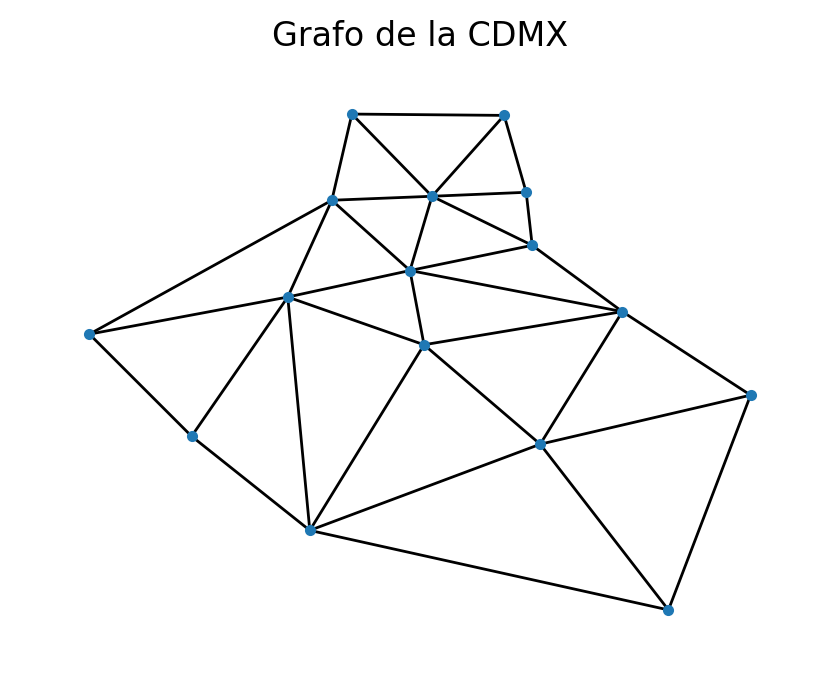

In [ ]:
p = [[205,-118],[281,-119],[195,-183],[245,-180],[292,-177],[74,-284],[173,-256],[234,-236],[295,-217],[125,-361],[241,-292],[340,-267],[184,-432],[299,-367],[404,-330],[363,-492]]
pos = {}
for i in range(n):
    pos[i] = p[i]
rows, cols = np.where(red == 1)
edges = zip(rows.tolist(), cols.tolist())
#Red
G = nx.Graph()
G.add_edges_from(edges)
#Mostrar grafo e imagen
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['figure.dpi'] = 200 
nx.draw(G,pos, node_size = 9)
plt.title("Grafo de la CDMX")
plt.show()

In [ ]:
mx = gpd.read_file('alcaldias.shp')
map_and_stats=mx.merge(db, on="nomgeo")

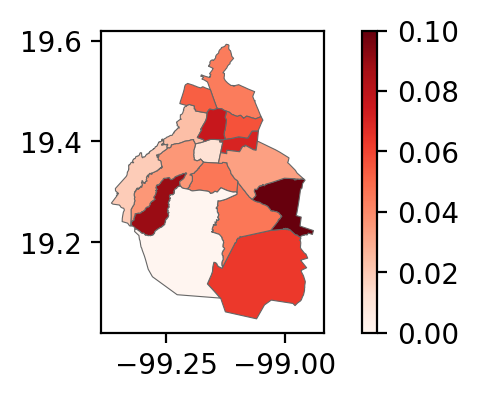

In [ ]:
year = "2021"
fig, ax = plt.subplots(1, figsize=(5,2))
map_and_stats.plot(column="Delitos_violencia_fam_"+year+"_densidad", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=0.1))
bar_info._A = []
cbar = fig.colorbar(bar_info)
#plt.title("Delitos_violencia_fam_"+year+"_densidad")

### Modelo de propagación

In [ ]:
cond_inic = db["Delitos_violencia_fam_2018_densidad"].values
c_i = [cond_inic[0],cond_inic[5],cond_inic[9],cond_inic[4],cond_inic[13],cond_inic[3],cond_inic[15],cond_inic[1],cond_inic[6],cond_inic[8],cond_inic[2],cond_inic[7],cond_inic[11],cond_inic[14],cond_inic[12],cond_inic[10]]

In [ ]:
c_i

[8.792124107772931e-05,
 8.096469002029231e-05,
 9.409607450478925e-05,
 0.0001483831729818057,
 9.015019021690135e-05,
 0.00012862563508907326,
 7.771983186170613e-05,
 0.00012438011484430602,
 0.00010378186041339774,
 7.672985437481322e-05,
 8.300146310422217e-05,
 8.499111407006101e-05,
 5.429129853356345e-05,
 9.498437280914019e-05,
 0.00020901677996905526,
 0.00011788977306218684]

In [ ]:
alc = ['Azcapotzalco','Gustavo A. Madero','Miguel Hidalgo','Cuauhtmoc','Venustiano Carranza','Cuajimalpa de Morelos',
       'lvaro Obregn','Benito Jurez','Iztacalco','La Magdalena Contreras','Coyoacn','Iztapalapa','Tlalpan','Xochimilco',
       'Tlhuac','Milpa Alta']

In [ ]:
dinamica_prop=np.array(c_i)
db_propagacion=pd.DataFrame({'nomgeo':alc, 'd0':dinamica_prop})

In [ ]:
for numdin in range(8):
  for deleg in range(16):
    prom=0
    c=0
    for vecino in range(16):
      if red[deleg,vecino] > 0:
        prom = prom + c_i[vecino]
        c = c+1
    
    dinamica_prop[deleg] = dinamica_prop[deleg] + (prom/c)*(1/10)
  c_i = dinamica_prop
  db_propagacion["d"+str(numdin+1)]=c_i

In [ ]:
db_propagacion

,nomgeo,d0,d1,d2,d3,d4,d5,d6,d7,d8
0,Azcapotzalco,0.000088,0.000099,0.000111,0.000124,0.000138,0.000154,0.000171,0.000191,0.000212
1,Gustavo A. Madero,0.000081,0.000092,0.000104,0.000118,0.000133,0.000149,0.000167,0.000187,0.000209
2,Miguel Hidalgo,0.000094,0.000105,0.000118,0.000132,0.000147,0.000163,0.000181,0.000200,0.000222
3,Cuauhtmoc,0.000148,0.000158,0.000169,0.000182,0.000196,0.000212,0.000229,0.000249,0.000270
4,Venustiano Carranza,0.000090,0.000101,0.000114,0.000128,0.000144,0.000162,0.000181,0.000202,0.000225
5,Cuajimalpa de Morelos,0.000129,0.000137,0.000147,0.000157,0.000170,0.000183,0.000198,0.000215,0.000233
6,lvaro Obregn,0.000078,0.000087,0.000098,0.000109,0.000123,0.000137,0.000153,0.000170,0.000190
7,Benito Jurez,0.000124,0.000134,0.000146,0.000158,0.000173,0.000188,0.000206,0.000225,0.000246
8,Iztacalco,0.000104,0.000115,0.000128,0.000143,0.000159,0.000176,0.000196,0.000217,0.000241
9,La Magdalena Contreras,0.000077,0.000085,0.000096,0.000107,0.000120,0.000134,0.000149,0.000166,0.000185


In [ ]:
modelo=mx.merge(db_propagacion, on="nomgeo")

Text(0.5, 1.0, 'Delitos violencia fam iteración: 8')

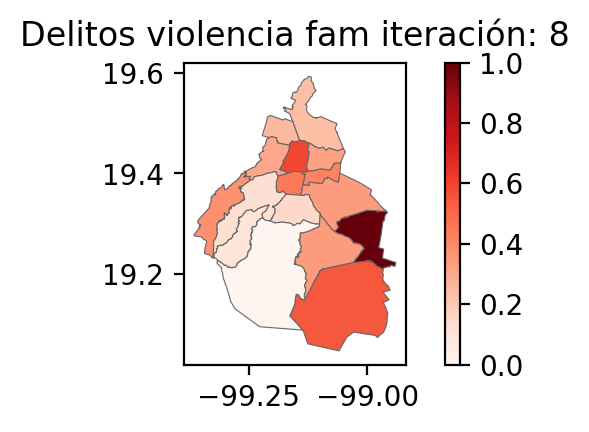

In [ ]:
iter = "8"
fig, ax = plt.subplots(1, figsize=(5,2))
modelo.plot(column="d"+iter, cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=1))
bar_info._A = []
cbar = fig.colorbar(bar_info)
plt.title("Delitos violencia fam iteración: "+iter)

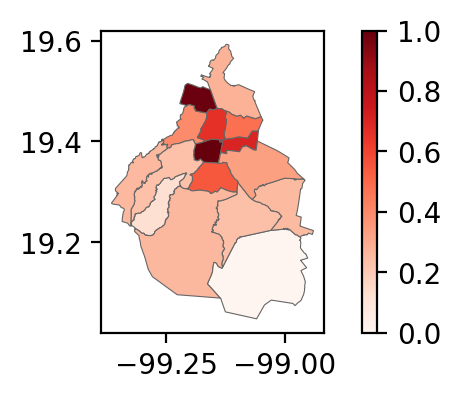

In [ ]:
year = "2021"
fig, ax = plt.subplots(1, figsize=(5,2))
map_and_stats.plot(column="Línea_mujeres_2020_densidad", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=1))
bar_info._A = []
cbar = fig.colorbar(bar_info)
#plt.title("Delitos_violencia_fam_"+year+"_densidad")

### Función de interacción

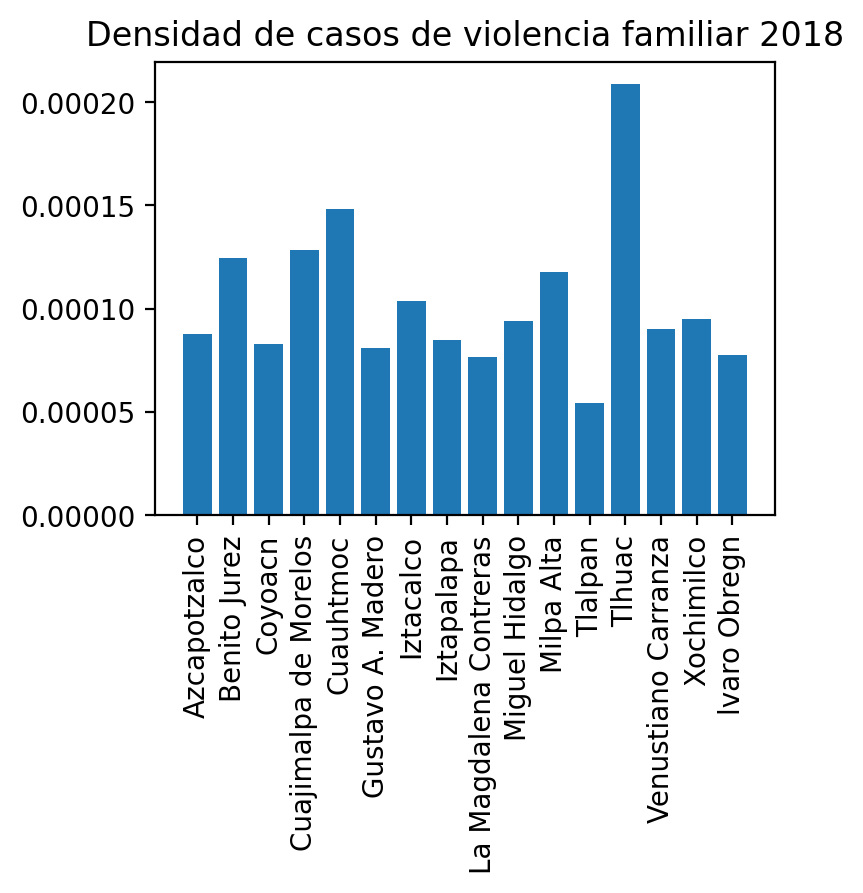

In [ ]:
x = np.arange(16)
y = db['Delitos_violencia_fam_2018_densidad'].values

fig, ax = plt.subplots()
plt.bar(x, y)
plt.title("Densidad de casos de violencia familiar 2018")
plt.xticks(x, db["nomgeo"].values)
plt.xticks(rotation=90)
plt.show()

In [ ]:
def umbral_interaccion(cond_inic,umbral,iteraciones):
  separacion = cond_inic.max()-cond_inic.min()


  c_i = [cond_inic[0],cond_inic[5],cond_inic[9],cond_inic[4],cond_inic[13],cond_inic[3],cond_inic[15],cond_inic[1],cond_inic[6],cond_inic[8],cond_inic[2],cond_inic[7],cond_inic[11],cond_inic[14],cond_inic[12],cond_inic[10]]
  csep = np.array(c_i)
  separacion = csep.max()-csep.min()
  print(separacion)
  alc = ['Azcapotzalco','Gustavo A. Madero','Miguel Hidalgo','Cuauhtmoc','Venustiano Carranza','Cuajimalpa de Morelos',
       'lvaro Obregn','Benito Jurez','Iztacalco','La Magdalena Contreras','Coyoacn','Iztapalapa','Tlalpan','Xochimilco',
       'Tlhuac','Milpa Alta']
    
  dinamica_prop=np.array(c_i)
  db_propagacion=pd.DataFrame({'nomgeo':alc, 'd0':dinamica_prop})

  for numdin in range(iteraciones):
    for deleg in range(16):
      prom=0
      c=0
      for vecino in range(16):
        if red[deleg,vecino] > 0:
          if abs(c_i[vecino]-c_i[deleg]) < separacion*umbral:

            prom = prom + c_i[vecino]
            c = c+1
      if c != 0:
        dinamica_prop[deleg] = dinamica_prop[deleg] + (prom/c)*(1/50)
      else:
        dinamica_prop[deleg] = dinamica_prop[deleg]
    c_i = dinamica_prop
    csep = np.copy(c_i)
    separacion = csep.max()-csep.min()


    db_propagacion["d"+str(numdin+1)]=c_i
  return db_propagacion

#### Umbral 0.5

In [ ]:
db

,Unnamed: 0,nomgeo,servicios_atencion_violencia,Línea_mujeres_2018,Línea_mujeres_2019,Línea_mujeres_2020,Casos_COVID,Atención_viol_gen_durante_contingencia,NBI_pobreza_alta_Hombres,NBI_pobreza_moderada_Hombres,NBI_satisfaccion_minima_Hombres,NBI_pobreza_muy_alta_Hombres,NBI_estrato_medio_Hombres,NBI_pobreza_alta_Mujeres,NBI_pobreza_moderada_Mujeres,NBI_satisfaccion_minima_Mujeres,NBI_pobreza_muy_alta_Mujeres,NBI_estrato_medio_Mujeres,Delitos_violencia_fam_2018,Delitos_violencia_fam_2019,Delitos_violencia_fam_2020,Delitos_violencia_fam_2021,Servicio_asesoria_mujeres,poblacion,Delitos_violencia_fam_2018_densidad,Delitos_violencia_fam_2019_densidad,Delitos_violencia_fam_2020_densidad,Delitos_violencia_fam_2021_densidad,Línea_mujeres_2018_densidad,Línea_mujeres_2019_densidad,Línea_mujeres_2020_densidad,NBI_pobreza_muy_alta_Hombres_densidad,Casos_COVID_densidad
0,0,Azcapotzalco,10,1022,354,236,23972,22,3454.800000,13258.833333,5834.200000,1038.600000,10845.800000,3587.800000,13979.000000,7180.800000,894.166667,13574.000000,38,1295,1543,1040,1,432205,0.000088,0.002996,0.003570,0.002406,0.002365,0.000819,0.000546,0.002403,0.055464
1,1,Benito Jurez,14,469,219,239,15648,39,1096.000000,8624.000000,5240.833333,404.200000,16101.666667,1213.833333,9510.666667,6872.600000,522.333333,23063.200000,54,987,926,683,2,434153,0.000124,0.002273,0.002133,0.001573,0.001080,0.000504,0.000550,0.000931,0.036043
2,2,Coyoacn,17,548,180,197,27332,40,4195.833333,16938.333333,6554.833333,1789.333333,19960.400000,4649.333333,18269.166667,7578.166667,1894.166667,23859.200000,51,1724,1964,1390,2,614447,0.000083,0.002806,0.003196,0.002262,0.000892,0.000293,0.000321,0.002912,0.044482
3,3,Cuajimalpa de Morelos,7,85,32,37,9504,15,2550.400000,7297.400000,2157.400000,1077.166667,5504.800000,2420.000000,6273.833333,2356.000000,1257.200000,5903.800000,28,575,552,377,2,217686,0.000129,0.002641,0.002536,0.001732,0.000390,0.000147,0.000170,0.004948,0.043659
4,4,Cuauhtmoc,66,625,156,206,24149,9,3952.833333,16830.000000,6547.000000,1845.333333,14958.600000,4515.166667,18371.833333,8731.000000,1905.400000,17072.000000,81,2261,2297,1572,2,545884,0.000148,0.004142,0.004208,0.002880,0.001145,0.000286,0.000377,0.003380,0.044238
5,5,Gustavo A. Madero,33,1067,291,213,52714,127,11112.500000,40985.500000,13230.166667,4864.833333,21315.166667,12267.333333,43176.500000,14644.166667,5150.000000,30342.400000,95,3300,3935,2619,2,1173351,0.000081,0.002812,0.003354,0.002232,0.000909,0.000248,0.000182,0.004146,0.044926
6,6,Iztacalco,12,646,270,162,18477,50,3868.600000,13116.833333,5733.000000,1029.833333,9725.400000,3416.000000,14531.333333,6551.800000,984.833333,9664.833333,42,1618,1579,1120,2,404695,0.000104,0.003998,0.003902,0.002768,0.001596,0.000667,0.000400,0.002545,0.045657
7,7,Iztapalapa,46,1630,527,387,67880,14,24598.166667,67699.166667,20771.600000,11700.666667,28647.800000,25631.500000,73396.333333,19670.666667,12083.833333,31333.800000,156,4890,5068,3691,1,1835486,0.000085,0.002664,0.002761,0.002011,0.000888,0.000287,0.000211,0.006375,0.036982
8,8,La Magdalena Contreras,11,150,46,26,15725,43,3058.166667,8626.166667,2686.400000,1679.333333,4407.000000,3868.600000,9307.166667,2512.833333,1624.500000,4825.600000,19,970,1151,779,1,247622,0.000077,0.003917,0.004648,0.003146,0.000606,0.000186,0.000105,0.006782,0.063504
9,9,Miguel Hidalgo,16,338,100,100,17609,9,1550.500000,8677.333333,5410.200000,527.200000,14372.200000,1603.833333,9848.500000,6381.800000,577.000000,16210.400000,39,969,1218,754,2,414470,0.000094,0.002338,0.002939,0.001819,0.000815,0.000241,0.000241,0.001272,0.042486


In [ ]:
u5 = umbral_interaccion(db['Delitos_violencia_fam_2018_densidad'].values,0.8,72)

0.00015472548143549182


In [ ]:
m5=mx.merge(u5, on="nomgeo")

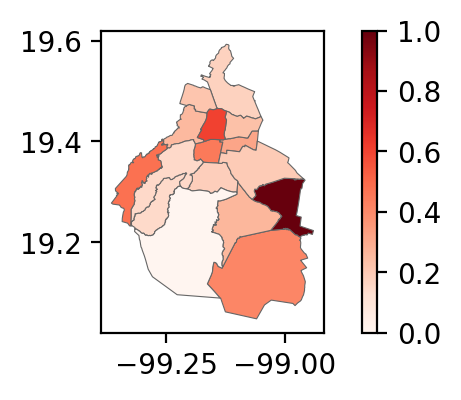

In [ ]:
iter = "0"
fig, ax = plt.subplots(1, figsize=(5,2))
m5.plot(column="d"+iter, cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=1))
bar_info._A = []
cbar = fig.colorbar(bar_info)
#plt.title("Delitos violencia fam iteración: "+iter)

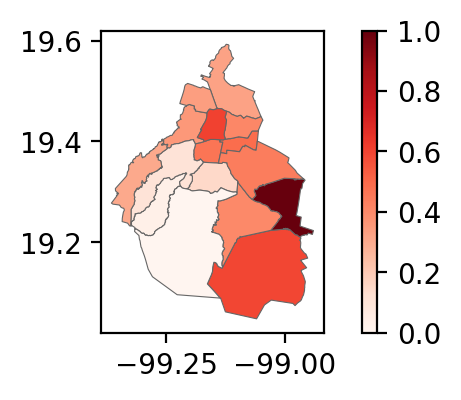

In [ ]:
iter = "70"
fig, ax = plt.subplots(1, figsize=(5,2))
m5.plot(column="d"+iter, cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=1))
bar_info._A = []
cbar = fig.colorbar(bar_info)
#plt.title("Delitos violencia fam iteración: "+iter)

In [ ]:
m6=m5.merge(db, on="nomgeo")

In [ ]:
a=m6["d70"].values
b=m6["Delitos_violencia_fam_2021_densidad"].values

np.corrcoef(a,b)

array([[1.        , 0.49839461],
       [0.49839461, 1.        ]])

In [ ]:
np.corrcoef(a,b)

array([[1.        , 0.49736205],
       [0.49736205, 1.        ]])